### Group 4 - BI Assignment
### Conecting PyCaret and PowerBI with Model
#### ROAD TRAFFIC ACCIDENT SEVERITY OF ADDIS ABABA CITY

#### Group Members 
##### Ameha Ademe ------------ DS/0090/16
##### Tarikua Gebre ------------ DS/0076/15
##### Negesse Getachew ------------ DS/0070/15
##### Muluken Chefaye ------------ DS/0068/15
##### Simachew Tenagne ------------ DS/0074/15

## Load package and data

In [1]:
#from pycaret.clustering import *
from pycaret.classification import * 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import sys
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("RTA_Dataset.csv")
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [3]:
#shape/ size of the data
df.shape

(12316, 32)

In [4]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [5]:
#Distribution of Accident severity
df['Accident_severity'].value_counts()

Accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Accident severity')

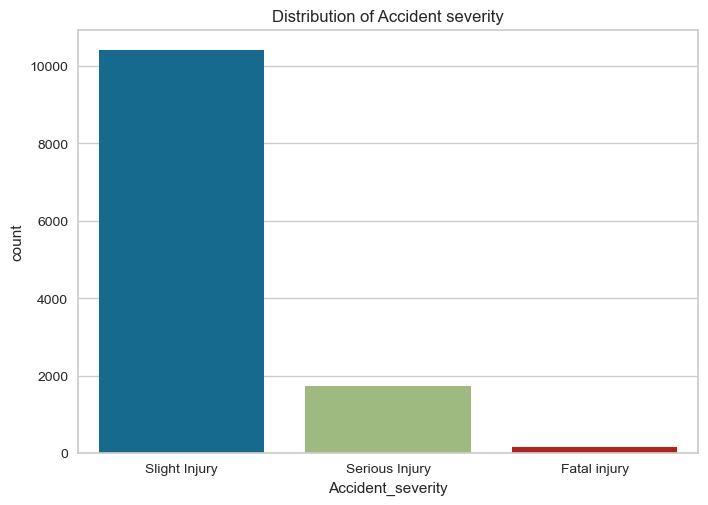

In [6]:
#plotting the final class
sns.countplot(x = df['Accident_severity'])
plt.title('Distribution of Accident severity')

In [7]:
#checking missing values
df.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [8]:
#dropping columns which has more than 2500 missing values and Time column
df.drop(['Service_year_of_vehicle','Defect_of_vehicle','Work_of_casuality', 'Fitness_of_casuality','Time'], axis = 1, inplace = True)
df.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,NaN,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,Undivided Two way,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,other,...,2,2,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,other,...,2,2,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,Industrial areas,other,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury


In [9]:
# After evaluating we are removing lesser important columns and storing to a new data frame
df2=df.drop(['Owner_of_vehicle', 'Type_of_vehicle', 'Road_surface_conditions', 'Pedestrian_movement',
         'Casualty_severity','Educational_level','Day_of_week','Sex_of_driver','Road_allignment',
         'Sex_of_casualty'],axis=1)
df2.head()

,Age_band_of_driver,Vehicle_driver_relation,Driving_experience,Area_accident_occured,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Age_band_of_casualty,Cause_of_accident,Accident_severity
0,18-30,Employee,1-2yr,Residential areas,NaN,No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,Moving Backward,Slight Injury
1,31-50,Employee,Above 10yr,Office areas,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,Overtaking,Slight Injury
2,18-30,Employee,1-2yr,Recreational areas,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,31-50,Changing lane to the left,Serious Injury
3,18-30,Employee,5-10yr,Office areas,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,18-30,Changing lane to the right,Slight Injury
4,18-30,Employee,2-5yr,Industrial areas,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,Overtaking,Slight Injury


In [33]:
df2.to_csv('C:/Users/Admin/Documents/Emerald/BI/Project/RTA_Dataset_Cleaned.csv', index=False)

### PyCaret Environment

In [10]:
setup(df2, normalize = True, train_size=0.7, target = 'Accident_severity', session_id=123)

,Description,Value
0,Session id,123
1,Target,Accident_severity
2,Target type,Multiclass
3,Target mapping,"Fatal injury: 0, Serious Injury: 1, Slight Injury: 2"
4,Original data shape,"(12316, 17)"
5,Transformed data shape,"(12316, 118)"
6,Transformed train set shape,"(8621, 118)"
7,Transformed test set shape,"(3695, 118)"
8,Numeric features,2
9,Categorical features,14


### Compare Evaluate and Create Model 

In [11]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [12]:
KNN = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8320,0.5474,0.8320,0.7483,0.7771,0.0299,0.0451
1,0.8167,0.4652,0.8167,0.7236,0.7640,-0.0273,-0.0370
2,0.8237,0.5740,0.8237,0.7360,0.7711,0.0001,0.0001
3,0.8260,0.5241,0.8260,0.7397,0.7734,0.0149,0.0208
4,0.8237,0.4892,0.8237,0.7204,0.7658,-0.0267,-0.0409
5,0.8318,0.5045,0.8318,0.7459,0.7757,0.0150,0.0234
6,0.8329,0.5158,0.8329,0.7599,0.7838,0.0614,0.0833
7,0.8318,0.5505,0.8318,0.7439,0.7761,0.0189,0.0288
8,0.8306,0.5351,0.8306,0.7543,0.7786,0.0322,0.0462


In [20]:
tuned_knn = tune_model(KNN)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8447,0.5507,0.8447,0.7136,0.7736,0.0000,0.0000
1,0.8445,0.5105,0.8445,0.7151,0.7744,-0.0022,-0.0139
2,0.8469,0.5902,0.8469,0.8576,0.7778,0.0127,0.0798
3,0.8457,0.5118,0.8457,0.7152,0.7750,0.0000,0.0000
4,0.8457,0.5566,0.8457,0.7152,0.7750,0.0000,0.0000
5,0.8445,0.5289,0.8445,0.7151,0.7744,-0.0022,-0.0139
6,0.8469,0.5636,0.8469,0.8111,0.7799,0.0230,0.0843
7,0.8469,0.5938,0.8469,0.8111,0.7799,0.0230,0.0843
8,0.8445,0.5268,0.8445,0.7151,0.7744,-0.0022,-0.0139


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [21]:
print(tuned_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='uniform')


In [13]:
print(KNN)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


In [23]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [24]:
KNN_df = assign_model(tuned_knn)

NameError: name 'assign_model' is not defined

In [25]:
final_knn = finalize_model(tuned_knn) 

In [26]:
predictions = predict_model(final_knn, data=df2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.8465,0,0.8465,0.8464,0.7772,0.0106,0.0693


In [27]:
predictions.head()

,Age_band_of_driver,Vehicle_driver_relation,Driving_experience,Area_accident_occured,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Age_band_of_casualty,Cause_of_accident,Accident_severity,prediction_label,prediction_score
0,18-30,Employee,1-2yr,Residential areas,NaN,No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,Moving Backward,Slight Injury,Slight Injury,0.8750
1,31-50,Employee,Above 10yr,Office areas,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,Overtaking,Slight Injury,Slight Injury,0.8125
2,18-30,Employee,1-2yr,Recreational areas,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,31-50,Changing lane to the left,Serious Injury,Slight Injury,0.8125
3,18-30,Employee,5-10yr,Office areas,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,18-30,Changing lane to the right,Slight Injury,Slight Injury,0.5625
4,18-30,Employee,2-5yr,Industrial areas,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,Overtaking,Slight Injury,Slight Injury,0.8750


### Plot Model

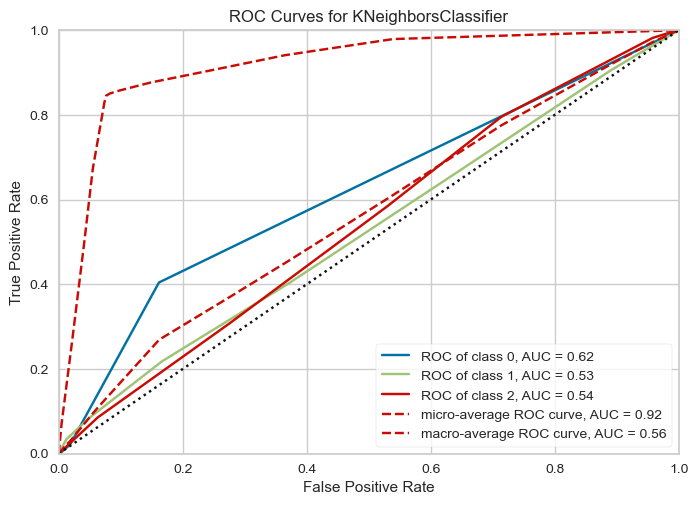

In [29]:
plot_model(tuned_knn)

### Save Model

In [30]:
save_model(final_knn, 'KNN_Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Number_of_vehicles_involved',
                                              'Number_of_casualties'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_fea...
                                                               handle_unknown='value',
                                                               return_df=True,
                                               